In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import mglearn
import pandas as pd
import mglearn

1.19.2
3.3.2


In [2]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
 font_name = font_manager.FontProperties(fname=path).get_name()
 rc('font', family=font_name)
elif platform.system()=="Darwin":
 rc('font', family='AppleGothic')
else:
 print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [3]:
train= pd.read_csv('/Users/kime/Desktop/Likelion_Project/235745_parking_data/train.csv')
test = pd.read_csv('/Users/kime/Desktop/Likelion_Project/235745_parking_data/test.csv')
sample_submission = pd.read_csv('/Users/kime/Desktop/Likelion_Project/235745_parking_data/sample_submission.csv')
age_gender = pd.read_csv('/Users/kime/Desktop/Likelion_Project/235745_parking_data/age_gender_info.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀
import pandas as pd

In [5]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [6]:
train.columns
print( train.isnull().sum() )
print( test.isnull().sum() )

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64
단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류

## 데이터 전처리

* label encoding
- '임대료' 결측치처리, int로 바꾸기

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [8]:
#결측치 처리
train['임대료'] = train['임대료'].fillna(0)
# train['임대료'] = train['임대료'].replace('0', train['임대료'].mean())
train['임대료'].isnull().sum()

0

In [9]:
train['임대료'] = train['임대료'].replace('-', 0)
train['임대료'].value_counts()

0         590
390000     19
79980      18
100920     16
167230     15
         ... 
234340      1
205880      1
236710      1
184940      1
197000      1
Name: 임대료, Length: 995, dtype: int64

In [10]:
# train['임대료'].astype(str)
train['임대료'] = train['임대료'].replace(0, '0')
train['임대료'].value_counts()

0         590
390000     19
79980      18
100920     16
167230     15
         ... 
194250      1
189050      1
138900      1
255200      1
65950       1
Name: 임대료, Length: 995, dtype: int64

In [11]:
# train['임대료'].astype(str).astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2952 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [12]:
import matplotlib.pyplot as plt
#01 데이터 나누기

sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '단지내주차면수', '임대료']
X = train[sel]
y = train['등록차량수']
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                                           test_size = 0.3,
                                                                           random_state=42)
model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([ 3.72104478e+02,  3.46934876e+02,  5.10202005e+02,  7.72358350e+02,
        5.09489060e+02,  4.75405199e+02,  5.03107317e+02,  2.89067704e+02,
        2.09509345e+02,  8.07467267e+02,  3.90187447e+02,  6.38878551e+02,
        1.60355500e+02,  1.27246666e+03,  3.17223389e+02,  2.06424414e+02,
        1.57465308e+03,  7.06406825e+02,  8.20846783e+01,  1.33092075e+03,
        4.52529184e+02, -8.17204944e-01,  6.95643544e+01,  9.41787797e+02,
        8.20846783e+01,  8.28393123e+02,  8.96932452e+01,  1.47351421e+02,
        2.57639636e+00,  9.59667883e+02,  3.22995460e+02,  4.87912263e+02,
        4.88283923e+02,  7.58987244e+02,  3.19215679e+02,  1.27792141e+02,
        3.79395713e+02,  1.60324327e+03,  1.26625253e+03,  5.05168559e+02,
        1.23871932e+02,  6.39039718e+02,  5.14578101e+02,  7.38600013e+02,
        9.29932813e+02,  8.29910655e+02,  9.76323651e+02,  5.63486460e+02,
        9.72277857e+02,  3.54686959e+02,  4.18440860e+02,  2.97805588e+02,
        1.14274277e+02,  

In [13]:
import pandas as pd

dict_dat = {"실제값 " : y_test, "예측값" : pred, "오차절댓값" :abs( y_test - pred),
           "오차제곱" : (y_test - pred)**2}
dat = pd.DataFrame(dict_dat)

#MAE - 각각의 값에 절댓값을 취한다, 이를 전부 더한 후 갯수로 나누어주기
mae_val = sum(dat['오차절댓값']) / len(dat['오차절댓값'])
print( "MAE : ", mae_val )
#MSE - (실제값 - 예측값)^2의 합을 데이터 샘플의 개수로 나누어주기
mse_val = sum(dat['오차제곱']) / len(dat['오차제곱'])
# mse_val = dat['오차제곱'].sum() / dat.shape[0]
print( "MSE : ", mse_val )
#RMSE - (실제값 - 예측값)^2의 합을 데이터 샘플의 개수로 나누어 준 뒤 루트 씌우기
rmse = np.sqrt(mse_val)
# rmse = mse_val ** 0.5
print("RMSE : ", rmse)

# R^2의 값을 구하기- 결정계수 구하기
print("훈련 데이터 세트 점수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(model.score(X_test, y_test)))

MAE :  144.05941023954963
MSE :  40979.353414945435
RMSE :  202.43357778527118
훈련 데이터 세트 점수 : 0.80
테스트 데이터 세트 점수 : 0.78


In [14]:
#라쏘
from sklearn.linear_model import Lasso, Ridge # Lasso : L1, Ridge: L2
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

학습용 데이터 세트 점수 : 0.80
테스트 데이터 세트 점수 : 0.78


In [15]:
#릿지
from sklearn.linear_model import Lasso, Ridge # Lasso : L1, Ridge: L2
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

학습용 데이터 세트 점수 : 0.80
테스트 데이터 세트 점수 : 0.78


Text(0.5, 1.0, 'Ridge alpha=0.01')

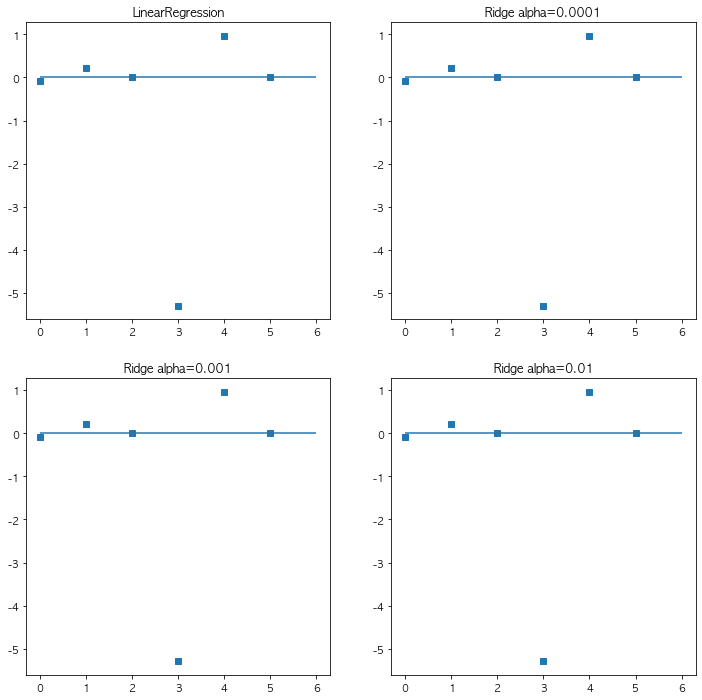

In [16]:
lr = LinearRegression().fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)

fig = plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label="LinearRegression")
plt.title('LinearRegression')
plt.subplot(2, 2, 2)
plt.hlines(0,0, len(ridge0001.coef_))
plt.plot(ridge0001.coef_, 's', label="Ridge alpha=0.0001")
plt.title('Ridge alpha=0.0001')
plt.subplot(2, 2, 3)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 's', label="Ridge alpha=0.001")
plt.title('Ridge alpha=0.001')
plt.subplot(2, 2, 4)
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

# 의사결정트리, 앙상블

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [24]:
# 01 데이터 나누기
sel = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '단지내주차면수', '임대료']
X = train[sel]
y = train['등록차량수']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                                           test_size = 0.2,
                                                                           random_state=77)

In [25]:
tree=DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 셋 정확도 : ", tree.score(X_train, y_train) )
print("테스트 데이터 셋 정확도 : ", tree.score(X_test, y_test) )

학습용 데이터 셋 정확도 :  0.08386277001270648
테스트 데이터 셋 정확도 :  0.08460236886632826


In [47]:
test_size_list = list(range(5, 41, 5))
for i in test_size_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=0)
    for j in range(1, 11):
        model = DecisionTreeClassifier(max_depth=j, random_state=0).fit(X_train, y_train)
        print('max_depth =', j, 'test_size =', i/100)
        print('학습용 데이터 평가 :', round(model.score(X_train, y_train), 4))
        print('테스트용 데이터 평가 :', round(model.score(X_test, y_test), 4))
        model_dict = dict(zip(list(X_train.columns), list(model.feature_importances_)))
        model_df = pd.Series(model_dict)
        print(model_df.sort_values(ascending=False).head(3))
        print()

max_depth = 1 test_size = 0.05
학습용 데이터 평가 : 0.0317
테스트용 데이터 평가 : 0.0405
총세대수       1.0
임대료        0.0
단지내주차면수    0.0
dtype: float64

max_depth = 2 test_size = 0.05
학습용 데이터 평가 : 0.0599
테스트용 데이터 평가 : 0.0743
총세대수       1.0
임대료        0.0
단지내주차면수    0.0
dtype: float64

max_depth = 3 test_size = 0.05
학습용 데이터 평가 : 0.0842
테스트용 데이터 평가 : 0.0811
총세대수       0.755171
단지내주차면수    0.244829
임대료        0.000000
dtype: float64

max_depth = 4 test_size = 0.05
학습용 데이터 평가 : 0.1049
테스트용 데이터 평가 : 0.1014
총세대수       0.658062
단지내주차면수    0.341938
임대료        0.000000
dtype: float64

max_depth = 5 test_size = 0.05
학습용 데이터 평가 : 0.1327
테스트용 데이터 평가 : 0.1351
단지내주차면수    0.426711
총세대수       0.422925
공가수        0.150365
dtype: float64

max_depth = 6 test_size = 0.05
학습용 데이터 평가 : 0.1694
테스트용 데이터 평가 : 0.1757
총세대수       0.467598
단지내주차면수    0.425418
공가수        0.106984
dtype: float64

max_depth = 7 test_size = 0.05
학습용 데이터 평가 : 0.1937
테스트용 데이터 평가 : 0.1824
단지내주차면수    0.511384
총세대수       0.447469
공가수        0.041147
dtype: flo